In [ ]:
import numpy
import pandas
import statsmodels.api as sm

def custom_heuristic(file_path):
    '''
    You are given a list of Titantic passengers and their associated
    information. More information about the data can be seen at the link below:
    http://www.kaggle.com/c/titanic-gettingStarted/data

    For this exercise, you need to write a custom heuristic that will take
    in some combination of the passenger's attributes and predict if the passenger
    survived the Titanic diaster.

    Can your custom heuristic beat 80% accuracy?
    
    The available attributes are:
    Pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name            Name
    Sex             Sex
    Age             Age
    SibSp           Number of Siblings/Spouses Aboard
    Parch           Number of Parents/Children Aboard
    Ticket          Ticket Number
    Fare            Passenger Fare
    Cabin           Cabin
    Embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)
                    
    SPECIAL NOTES:
    Pclass is a proxy for socioeconomic status (SES)
    1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in years; fractional if age less than one
    If the age is estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. SibSp and Parch)
    some relations were ignored. The following are the definitions used
    for SibSp and Parch.

    Sibling:  brother, sister, stepbrother, or stepsister of passenger aboard Titanic
    Spouse:   husband or wife of passenger aboard Titanic (mistresses and fiancees ignored)
    Parent:   mother or father of passenger aboard Titanic
    Child:    son, daughter, stepson, or stepdaughter of passenger aboard Titanic
    
    Write your prediction back into the "predictions" dictionary. The
    key of the dictionary should be the passenger's id (which can be accessed
    via passenger["PassengerId"]) and the associating value should be 1 if the
    passenger survvied or 0 otherwise. 

    For example, if a passenger is predicted to have survived:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 1

    And if a passenger is predicted to have perished in the disaster:
    passenger_id = passenger['PassengerId']
    predictions[passenger_id] = 0
    
    You can also look at the Titantic data that you will be working with
    at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/titanic_data.csv
    '''

    predictions = {}
    df = pandas.read_csv(file_path)
    for passenger_index, passenger in df.iterrows():
        passenger_id = passenger['PassengerId']
        if passenger['Sex'] == 'female':
            predictions[passenger_id] = 1
        elif passenger['Age'] < 16 and (passenger['Pclass'] == 1 or passenger['Pclass'] == 2):
            predictions[passenger_id] = 1
        else:
            predictions[passenger_id] = 0
    return predictions

if __name__ == "__main__":
    print custom_heuristic("data/titanic_data.csv")

In [ ]:
import pandas

def add_full_name(path_to_csv, path_to_new_csv):
    #Assume you will be reading in a csv file with the same columns that the
    #Lahman baseball data set has -- most importantly, there are columns
    #called 'nameFirst' and 'nameLast'.
    #1) Write a function that reads a csv
    #located at "path_to_csv" into a pandas dataframe and adds a new column
    #called 'nameFull' with a player's full name.
    #
    #For example:
    #   for Hank Aaron, nameFull would be 'Hank Aaron', 
	#
	#2) Write the data in the pandas dataFrame to a new csv file located at
	#path_to_new_csv

    #WRITE YOUR CODE HERE
    df = pandas.read_csv(path_to_csv)
    df['nameFull'] = df['nameFirst'] + ' ' + df['nameLast']
    df.to_csv(path_to_new_csv)



if __name__ == "__main__":
    # For local use only
    # If you are running this on your own machine add the path to the
    # Lahman baseball csv and a path for the new csv.
    # The dataset can be downloaded from this website: http://www.seanlahman.com/baseball-archive/statistics
    # We are using the file Master.csv
    path_to_csv = ""
    path_to_new_csv = ""
    add_full_name(path_to_csv, path_to_new_csv)


In [ ]:
import pandas
import pandasql

def select_first_50(filename):
    # Read in our aadhaar_data csv to a pandas dataframe.  Afterwards, we rename the columns
    # by replacing spaces with underscores and setting all characters to lowercase, so the
    # column names more closely resemble columns names one might find in a table.
    aadhaar_data = pandas.read_csv(filename)
    aadhaar_data.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)

    # Select out the first 50 values for "registrar" and "enrolment_agency"
    # in the aadhaar_data table using SQL syntax. 
    #
    # Note that "enrolment_agency" is spelled with one l. Also, the order
    # of the select does matter. Make sure you select registrar then enrolment agency
    # in your query.
    #
    # You can download a copy of the aadhaar data that we are passing 
    # into this exercise below:
    # https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/aadhaar_data.csv
    q = """
    -- YOUR QUERY HERE
    SELECT 
    registrar, enrolment_agency
    FROM
    aadhaar_data
    LIMIT 50;
    """
    
     #q2 = 
    """
    SELECT 
    gender, district, sum(aadhaar_generated) 
    FROM 
    aadhaar_data 
    WHERE 
    age > 50 
    GROUP BY
    gender, district;
    
    """
    
    #Execute your SQL command against the pandas frame
    aadhaar_solution = pandasql.sqldf(q.lower(), locals())
    return aadhaar_solution

if __name__ == "__main__":
    print select_first_50("data/aadhaar_data.csv")

In [ ]:
import json
import requests

def api_get_request(url):
    # In this exercise, you want to call the last.fm API to get a list of the
    # top artists in Spain. The grader will supply the URL as an argument to
    # the function; you do not need to construct the address or call this
    # function in your grader submission.
    # 
    # Once you've done this, return the name of the number 1 top artist in
    # Spain. 
    data = requests.get(url).text
    data = json.loads(data)
    
    return data['topartists']['artist']['rank'==1]['name']

url = 'http://ws.audioscrobbler.com/2.0/?method=geo.gettopartists&country=spain&limit=1&api_key=32c501b950e032a2a0879128bc47977b&format=json'
print api_get_request(url)


In [ ]:
  # Pandas dataframes have a method called 'fillna(value)', such that you can
    # pass in a single value to replace any NAs in a dataframe or series. You
    # can call it like this: 
    #     dataframe['column'] = dataframe['column'].fillna(value)
    #
    # Using the numpy.mean function, which calculates the mean of a numpy
    # array, impute any missing values in our Lahman baseball
    # data sets 'weight' column by setting them equal to the average weight.
    # 
    # You can access the 'weight' colum in the baseball data frame by
    # calling baseball['weight']

baseball['weight'] = baseball['weight'].fillna(numpy.mean(baseball['weight']))

In [ ]:
# Your task is to read the input DATAFILE line by line, and for the first 10 lines (not including the header)
# split each line on "," and then for each line, create a dictionary
# where the key is the header title of the field, and the value is the value of that field in the row.
# The function parse_file should return a list of dictionaries,
# each data line in the file being a single list entry.
# Field names and values should not contain extra whitespace, like spaces or newline characters.
# You can use the Python string method strip() to remove the extra whitespace.
# You have to parse only the first 10 data lines in this exercise,
# so the returned list should have 10 entries!
import os
import pandas
DATADIR = ""
DATAFILE = "data/beatles-diskography.csv"


def parse_file(datafile):
    data = []
    beatle_data = pandas.read_csv(datafile)
    print "Panda CSV", beatle_data.to_json() 
    with open(datafile, "rb") as f:
        header = f.readline().split(",")
        counter = 0
        for line in f:
            if counter == 10:
                 break
            fields = line.split(",")
            entry = {}
            
            for i, value in enumerate(fields):
                entry[header[i].strip()] = value.strip()
                
            data.append(entry)
            counter +=1

    return data


if __name__ == "__main__":
    # a simple test of your implemetation
    datafile = os.path.join(DATADIR, DATAFILE)
    print "Custom CSV", parse_file(datafile)
    #firstline = {'Title': 'Please Please Me', 'UK Chart Position': '1', 'Label': 'Parlophone(UK)', 'Released': '22 March 1963', 'US Chart Position': '-', 'RIAA Certification': 'Platinum', 'BPI Certification': 'Gold'}
    #tenthline = {'Title': '', 'UK Chart Position': '1', 'Label': 'Parlophone(UK)', 'Released': '10 July 1964', 'US Chart Position': '-', 'RIAA Certification': '', 'BPI Certification': 'Gold'}

    #assert d[0] == firstline
    #assert d[9] == tenthline


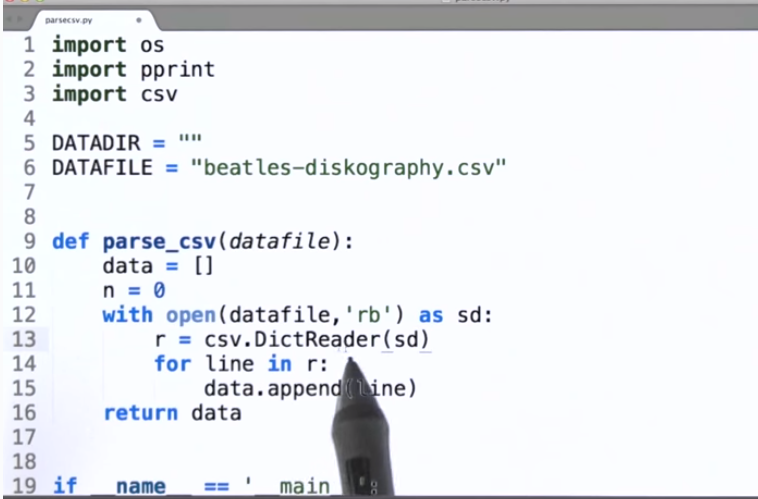

In [14]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='images/csvModule.PNG'))

In [ ]:
import xlrd

datafile = "2013_ERCOT_Hourly_Load_Data.xls"


def parse_file(datafile):
    workbook = xlrd.open_workbook(datafile)
    sheet = workbook.sheet_by_index(0)

    data = [[sheet.cell_value(r, col) 
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)]

    print "\nList Comprehension"
    print "data[3][2]:",
    print data[3][2]

    print "\nCells in a nested loop:"    
    for row in range(sheet.nrows):
        for col in range(sheet.ncols):
            if row == 50:
                print sheet.cell_value(row, col),


    ### other useful methods:
    print "\nROWS, COLUMNS, and CELLS:"
    print "Number of rows in the sheet:", 
    print sheet.nrows
    print "Type of data in cell (row 3, col 2):", 
    print sheet.cell_type(3, 2)
    print "Value in cell (row 3, col 2):", 
    print sheet.cell_value(3, 2)
    print "Get a slice of values in column 3, from rows 1-3:"
    print sheet.col_values(3, start_rowx=1, end_rowx=4)

    print "\nDATES:"
    print "Type of data in cell (row 1, col 0):", 
    print sheet.cell_type(1, 0)
    exceltime = sheet.cell_value(1, 0)
    print "Time in Excel format:",
    print exceltime
    print "Convert time to a Python datetime tuple, from the Excel float:",
    print xlrd.xldate_as_tuple(exceltime, 0)

    return data

data = parse_file(datafile)

In [1]:
# To experiment with this code freely you will have to run this code locally.
# Take a look at the main() function for an example of how to use the code.
# We have provided example json output in the other code editor tabs for you to
# look at, but you will not be able to run any queries through our UI.
import json
import requests


BASE_URL = "http://musicbrainz.org/ws/2/"
ARTIST_URL = BASE_URL + "artist/"

# query parameters are given to the requests.get function as a dictionary; this
# variable contains some starter parameters.
query_type = {  "simple": {},
                "atr": {"inc": "aliases+tags+ratings"},
                "aliases": {"inc": "aliases"},
                "releases": {"inc": "releases"}}


def query_site(url, params, uid="", fmt="json"):
    # This is the main function for making queries to the musicbrainz API.
    # A json document should be returned by the query.
    params["fmt"] = fmt
    r = requests.get(url + uid, params=params)
    print "requesting", r.url

    if r.status_code == requests.codes.ok:
        return r.json()
    else:
        r.raise_for_status()


def query_by_name(url, params, name):
    # This adds an artist name to the query parameters before making
    # an API call to the function above.
    params["query"] = "artist:" + name
    return query_site(url, params)


def pretty_print(data, indent=4):
    # After we get our output, we can format it to be more readable
    # by using this function.
    if type(data) == dict:
        print json.dumps(data, indent=indent, sort_keys=True)
    else:
        print data


def main():
    '''
    Modify the function calls and indexing below to answer the questions on
    the next quiz. HINT: Note how the output we get from the site is a
    multi-level JSON document, so try making print statements to step through
    the structure one level at a time or copy the output to a separate output
    file.
    '''
    results = query_by_name(ARTIST_URL, query_type["simple"], "Nirvana")
    pretty_print(results)

    artist_id = results["artists"][1]["id"]
    print "\nARTIST:"
    pretty_print(results["artists"][1])

    artist_data = query_site(ARTIST_URL, query_type["releases"], artist_id)
    releases = artist_data["releases"]
    print "\nONE RELEASE:"
    pretty_print(releases[0], indent=2)
    release_titles = [r["title"] for r in releases]

    print "\nALL TITLES:"
    for t in release_titles:
        print t


if __name__ == '__main__':
    main()


requesting http://musicbrainz.org/ws/2/artist/?query=artist%3ANirvana&fmt=json
{
    "artists": [
        {
            "aliases": [
                {
                    "begin-date": null, 
                    "end-date": null, 
                    "locale": null, 
                    "name": "Nirvana US", 
                    "primary": null, 
                    "sort-name": "Nirvana US", 
                    "type": null
                }
            ], 
            "area": {
                "id": "489ce91b-6658-3307-9877-795b68554c98", 
                "name": "United States", 
                "sort-name": "United States"
            }, 
            "begin-area": {
                "id": "a640b45c-c173-49b1-8030-973603e895b5", 
                "name": "Aberdeen", 
                "sort-name": "Aberdeen"
            }, 
            "country": "US", 
            "disambiguation": "90s US grunge band", 
            "id": "5b11f4ce-a62d-471e-81fc-a69a8278c7da", 
            "life-span

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Please note that the function 'make_request' is provided for your reference only.
# You will not be able to to actually use it from within the Udacity web UI.
# Your task is to process the HTML using BeautifulSoup, extract the hidden
# form field values for "__EVENTVALIDATION" and "__VIEWSTATE" and set the appropriate
# values in the data dictionary.
# All your changes should be in the 'extract_data' function
from bs4 import BeautifulSoup
import requests
import json

html_page = "http://www.transtats.bts.gov/Data_Elements.aspx?Data=2"


def extract_data(page):
    data = {"eventvalidation": "",
            "viewstate": ""}
    with open(page, "r") as html:
        soup = BeautifulSoup(html, "lxml")
        ev = soup.find(id="__EVENTVALIDATION")
        data["eventvalidation"] = ev["value"]

        vs = soup.find(id="__VIEWSTATE")
        data["viewstate"] = vs["value"]

    return data


def make_request(data):
    eventvalidation = data["eventvalidation"]
    viewstate = data["viewstate"]

    r = requests.post("http://www.transtats.bts.gov/Data_Elements.aspx?Data=2",
                    data={'AirportList': "BOS",
                          'CarrierList': "VX",
                          'Submit': 'Submit',
                          "__EVENTTARGET": "",
                          "__EVENTARGUMENT": "",
                          "__EVENTVALIDATION": eventvalidation,
                          "__VIEWSTATE": viewstate
                    })

    return r.text


def test():
    data = extract_data(html_page)
    assert data["eventvalidation"] != ""
    assert data["eventvalidation"].startswith("/wEWjAkCoIj1ng0")
    assert data["viewstate"].startswith("/wEPDwUKLTI")

    
test()

IOError: [Errno 2] No such file or directory: 'http://www.transtats.bts.gov/Data_Elements.aspx?Data=2'

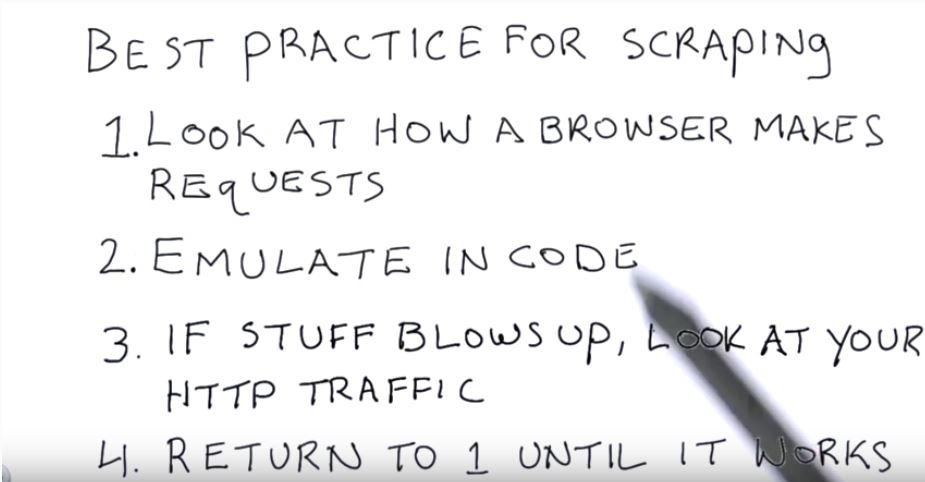

In [4]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='images/scrap_web.JPG'))

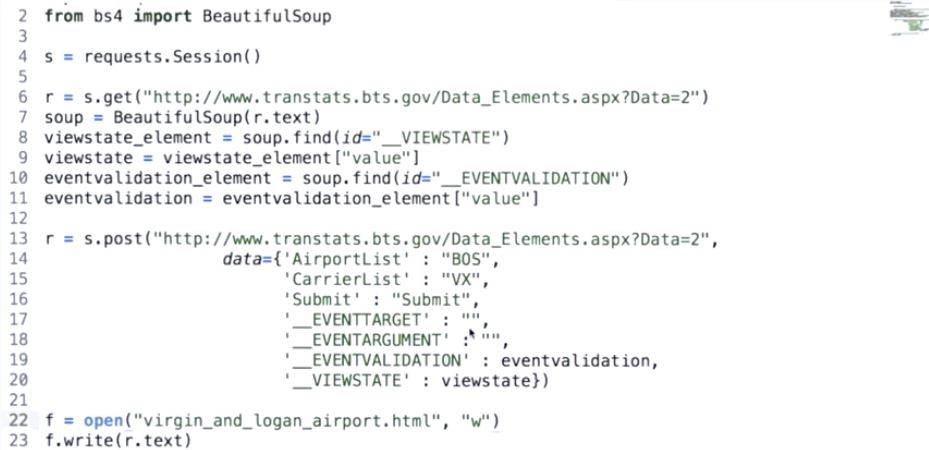

In [5]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='images/scrap_web_session.JPG'))

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
### data cleaning
import xml.etree.cElementTree as ET
from collections import defaultdict
import re

osm_file = open("chicago.osm", "r")

street_type_re = re.compile(r'\S+\.?$', re.IGNORECASE)
street_types = defaultdict(int)

def audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()

        street_types[street_type] += 1

def print_sorted_dict(d):
    keys = d.keys()
    keys = sorted(keys, key=lambda s: s.lower())
    for k in keys:
        v = d[k]
        print "%s: %d" % (k, v) 

def is_street_name(elem):
    return (elem.tag == "tag") and (elem.attrib['k'] == "addr:street")

def audit():
    for event, elem in ET.iterparse(osm_file):
        if is_street_name(elem):
            audit_street_type(street_types, elem.attrib['v'])    
    print_sorted_dict(street_types)    

if __name__ == '__main__':
    audit()

In [14]:
"""
Your task is to check the "productionStartYear" of the DBPedia autos datafile for valid values.
The following things should be done:
- check if the field "productionStartYear" contains a year
- check if the year is in range 1886-2014
- convert the value of the field to be just a year (not full datetime)
- the rest of the fields and values should stay the same
- if the value of the field is a valid year in the range as described above,
  write that line to the output_good file
- if the value of the field is not a valid year as described above, 
  write that line to the output_bad file
- discard rows (neither write to good nor bad) if the URI is not from dbpedia.org
- you should use the provided way of reading and writing data (DictReader and DictWriter)
  They will take care of dealing with the header.

You can write helper functions for checking the data and writing the files, but we will call only the 
'process_file' with 3 arguments (inputfile, output_good, output_bad).
"""
import csv
import pprint

INPUT_FILE = 'data/autos.csv'
OUTPUT_GOOD = 'data/autos-valid.csv'
OUTPUT_BAD = 'data/FIXME-autos.csv'

def process_file(input_file, output_good, output_bad):
    # store data into lists for output
    data_good = []
    data_bad = []
    with open(input_file, "r") as f:
        reader = csv.DictReader(f)
        header = reader.fieldnames
        for row in reader:
            #print row
            # validate URI value
            if row['URI'].find("dbpedia.org") < 0:
                continue

            ps_year = row['productionStartYear'][:4]
            try: # use try/except to filter valid items
                ps_year = int(ps_year)
                row['productionStartYear'] = ps_year
                if (ps_year >= 1886) and (ps_year <= 2014):
                    data_good.append(row)
                else:
                    data_bad.append(row)
            except ValueError: # non-numeric strings caught by exception
                if ps_year == 'NULL':
                    data_bad.append(row)

    # Write processed data to output files
    with open(output_good, "w") as good:
        writer = csv.DictWriter(good, delimiter=",", fieldnames= header)
        writer.writeheader()
        for row in data_good:
            writer.writerow(row)

    with open(output_bad, "w") as bad:
        writer = csv.DictWriter(bad, delimiter=",", fieldnames= header)
        writer.writeheader()
        for row in data_bad:
            writer.writerow(row)


def test():

    process_file(INPUT_FILE, OUTPUT_GOOD, OUTPUT_BAD)


if __name__ == "__main__":
    test()

None


In [ ]:
#!/usr/bin/env python
"""
The tweets in our twitter collection have a field called "source". This field describes the application
that was used to create the tweet. Following the examples for using the $group operator, your task is 
to modify the 'make-pipeline' function to identify most used applications for creating tweets. 
As a check on your query, 'web' is listed as the most frequently used application.
'Ubertwitter' is the second most used. The number of counts should be stored in a field named 'count'
(see the assertion at the end of the script).

Please modify only the 'make_pipeline' function so that it creates and returns an aggregation pipeline
that can be passed to the MongoDB aggregate function. As in our examples in this lesson, the aggregation 
pipeline should be a list of one or more dictionary objects. 
Please review the lesson examples if you are unsure of the syntax.

Your code will be run against a MongoDB instance that we have provided. 
If you want to run this code locally on your machine, you have to install MongoDB, 
download and insert the dataset.
For instructions related to MongoDB setup and datasets please see Course Materials.

Please note that the dataset you are using here is a smaller version of the twitter dataset 
used in examples in this lesson. 
If you attempt some of the same queries that we looked at in the lesson examples,
your results will be different.
"""


def get_db(db_name):
    from pymongo import MongoClient
    client = MongoClient('localhost:27017')
    db = client[db_name]
    return db

def make_pipeline():
    # complete the aggregation pipeline
    pipeline = [{ "$group" : { "_id" : "$source", "count" : { "$sum" : 1} } },{ "$sort" : { "count" : -1 } }]
    return pipeline

def tweet_sources(db, pipeline):
    return [doc for doc in db.tweets.aggregate(pipeline)]

if __name__ == '__main__':
    db = get_db('twitter')
    pipeline = make_pipeline()
    result = tweet_sources(db, pipeline)
    import pprint
    pprint.pprint(result[0])
    assert result[0] == {u'count': 868, u'_id': u'web'}
